In [1]:
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append('./src')

import simulation as sim
import constant as ct
from PoissonNeuron import PoissonNeuron
from TwoPopulationSimulation import TwoPopulationSimulation

In [2]:
speed = 1e-2  # Constant speed
max_delta_theta = np.pi/60

# 3.1

(30000,) (30000, 2)


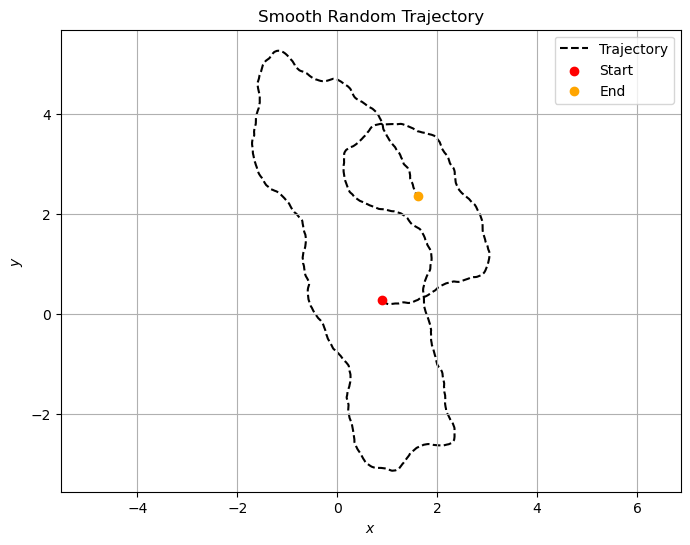

In [11]:
head_directions, positions = sim.smooth_random_trajectory(ct.T, ct.delta_t, speed, max_delta_theta)
print(head_directions.shape, positions.shape)

# Plot trajectory
plt.figure(figsize=(8, 6))
plt.plot(positions[:, 0], positions[:, 1], label='Trajectory', color='black', ls='--', zorder=1)
plt.scatter(positions[0, 0], positions[0, 1], color='red', label='Start', zorder=2)
plt.scatter(positions[-1, 0], positions[-1, 1], color='orange', label='End', zorder=2)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title('Smooth Random Trajectory')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

(100, 1)


C:\Users\camil\AppData\Local\Temp\ipykernel_26160\3277479281.py:9: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  ax.text(np.math.radians(label_position-10),(ax.get_rmax()+2)/2.,'Time (ms)',


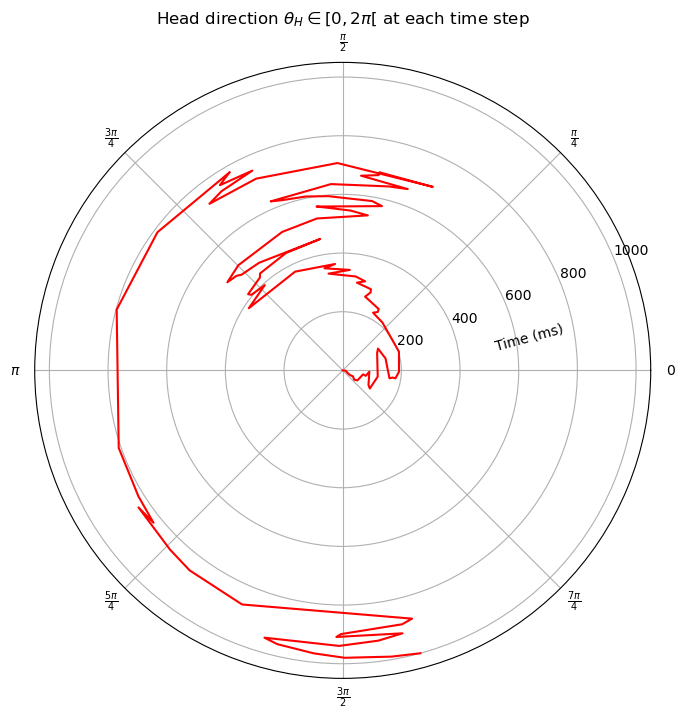

In [16]:
plt.figure(figsize=(8,8))
ax = plt.subplot(111, projection='polar')

head_dir_smooth = sim.bins_spike(head_directions, 10, ct.delta_t, 1, mean=True)
print(head_dir_smooth.shape)
ax.plot(head_dir_smooth, np.linspace(0, ct.T, len(head_dir_smooth)), color='red')

label_position=ax.get_rlabel_position()
ax.text(np.math.radians(label_position-10),(ax.get_rmax()+2)/2.,'Time (ms)',
        rotation= 15, ha='left',va='center')

# Set angular ticks to radians
ax.set_xticks(np.linspace(0, 2*np.pi, 8, endpoint=False))  # Set ticks at 0, pi/4, pi/2, 3pi/4, pi, 5pi/4, 3pi/2, 7pi/4
ax.set_xticklabels(['0', r'$\frac{\pi}{4}$', r'$\frac{\pi}{2}$', r'$\frac{3\pi}{4}$', r'$\pi$', r'$\frac{5\pi}{4}$', r'$\frac{3\pi}{2}$', r'$\frac{7\pi}{4}$'])
# Show the plot
plt.title(r'Head direction $\theta_H \in [0, 2\pi[$ at each time step')
plt.show()


# 3.2

In [38]:
head_dirs, positions = sim.smooth_random_trajectory(ct.T, ct.delta_t, speed, max_delta_theta)
network = PoissonNeuron(I_0=1, theta_H=head_dirs)
h,s = network.spike_simulation(input_fct=network.head_external_input, initial_voltage=np.random.uniform(0, 1, ct.N))

h10 = sim.bins_spike(head_dirs, 10, N=1, mean=True)
s10 = sim.bins_spike(s, 10, N=ct.N)
bump_loc = sim.get_bump(s10)

100%|██████████| 9999/9999 [00:00<00:00, 25600.08it/s]


C:\Users\camil\AppData\Local\Temp\ipykernel_26160\483046694.py:8: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  ax.text(np.math.radians(label_position-10),(ax.get_rmax()+2)/2.,'Time (ms)',


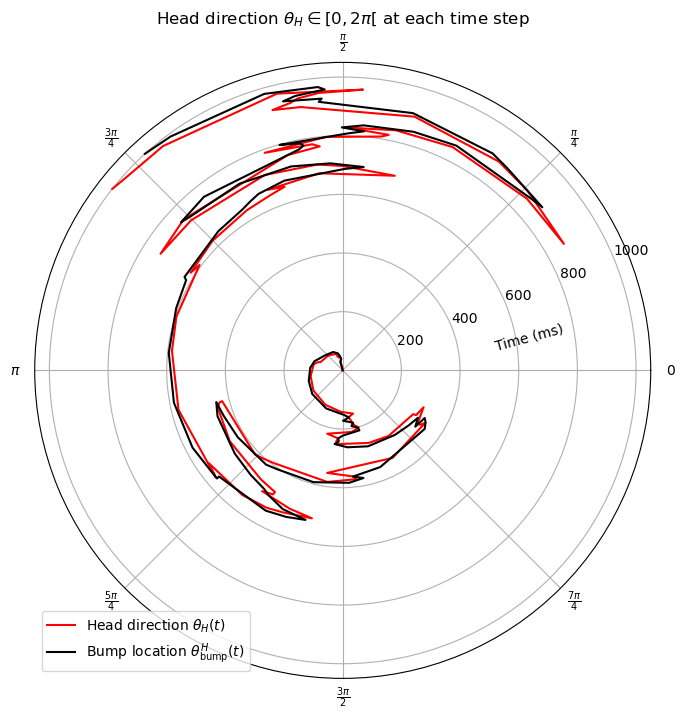

In [39]:
plt.figure(figsize=(8,8))
ax = plt.subplot(111, projection='polar')

ax.plot(h10, np.linspace(0, ct.T, len(h10)), color='red', label=r'Head direction $\theta_H (t)$')
ax.plot(bump_loc, np.linspace(0, ct.T, len(h10)), color='black', label=r'Bump location $\theta^H_{\text{bump}} (t)$')

label_position=ax.get_rlabel_position()
ax.text(np.math.radians(label_position-10),(ax.get_rmax()+2)/2.,'Time (ms)',
        rotation= 15, ha='left',va='center')

# Set angular ticks to radians
ax.set_xticks(np.linspace(0, 2*np.pi, 8, endpoint=False))  # Set ticks at 0, pi/4, pi/2, 3pi/4, pi, 5pi/4, 3pi/2, 7pi/4
ax.set_xticklabels(['0', r'$\frac{\pi}{4}$', r'$\frac{\pi}{2}$', r'$\frac{3\pi}{4}$', r'$\pi$', r'$\frac{5\pi}{4}$', r'$\frac{3\pi}{2}$', r'$\frac{7\pi}{4}$'])
plt.title(r'Head direction $\theta_H \in [0, 2\pi[$ at each time step')
plt.legend()
plt.show()

In [4]:
10*np.pi/180

0.17453292519943295

# 3.3

In [144]:
# defining smooth random trajectory
head_dirs, positions = sim.smooth_random_trajectory(ct.T, ct.delta_t, speed, max_delta_theta)

# defining head population and running spike simulation to get spikes
head_population = PoissonNeuron(I_0=1, theta_H=head_dirs)
h,s = head_population.spike_simulation(input_fct=head_population.head_external_input, initial_voltage=np.random.uniform(0, 1, ct.N))

# defining the integrator that uses the head population information 
integrator = TwoPopulationSimulation(J_head=1.4, head_population=head_population, J=3)
hL, sL, hR, sR = integrator.simulation(initial_voltage=integrator.centered_voltage)

print(f'Maximum of head input: {np.max(integrator.I_head)}')
print(f'Minimum of head input: {np.min(integrator.I_head)}')

100%|██████████| 9999/9999 [00:01<00:00, 8811.50it/s]


Maximum of head input: 0.2634554476747367
Minimum of head input: -0.7191165171709918


In [210]:
#fix seed
np.random.seed(3)

J_values = np.linspace(1, 2, 5)

# defining smooth random trajectory
head_dirs, positions = sim.smooth_random_trajectory(ct.T, ct.delta_t, speed, max_delta_theta)

# defining head population and running spike simulation to get spikes
head_population = PoissonNeuron(I_0=1, theta_H=head_dirs, N=500)
h,s = head_population.spike_simulation(input_fct=head_population.head_external_input, initial_voltage=np.random.uniform(0, 1, 500))

I = []
for J in J_values:
    # defining the integrator that uses the head population information 
    integrator = TwoPopulationSimulation(J_head=J, head_population=head_population, J=3, N = 500)
    hL, sL, hR, sR = integrator.simulation(initial_voltage=integrator.centered_voltage)

    I.append(integrator.I_head)

100%|██████████| 9999/9999 [00:04<00:00, 2297.14it/s]


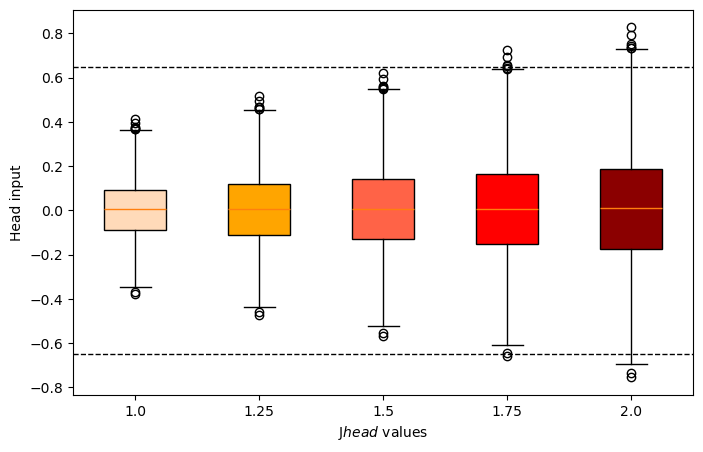

In [211]:
colors = ['peachpuff', 'orange', 'tomato', 'red', 'darkred','peachpuff', 'orange', 'tomato', 'red', 'darkred']
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_ylabel('Head input')
ax.set_xlabel('J$head$ values')
bplot = ax.boxplot(I, patch_artist=True, labels=J_values)

for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
    
plt.axhline(y=0.65, color='black', linestyle='--', linewidth=1)
plt.axhline(y=-0.65, color='black', linestyle='--', linewidth=1)

plt.show()

In [212]:
fig.savefig('3_3_2.png', dpi=600)

Min and max values are indeed in $[-0.5, 0.5]$

Running simulation 0.0


100%|██████████| 9999/9999 [00:07<00:00, 1378.88it/s]


Running simulation 1.0


100%|██████████| 9999/9999 [00:06<00:00, 1549.30it/s]


Running simulation 2.0


100%|██████████| 9999/9999 [00:06<00:00, 1608.73it/s]


Running simulation 3.0


100%|██████████| 9999/9999 [00:04<00:00, 2454.20it/s]


Running simulation 4.0


100%|██████████| 9999/9999 [00:03<00:00, 2919.44it/s]


Running simulation 5.0


100%|██████████| 9999/9999 [00:03<00:00, 2805.90it/s]


Running simulation 6.0


100%|██████████| 9999/9999 [00:03<00:00, 2950.81it/s]


Running simulation 7.0


100%|██████████| 9999/9999 [00:04<00:00, 2390.26it/s]


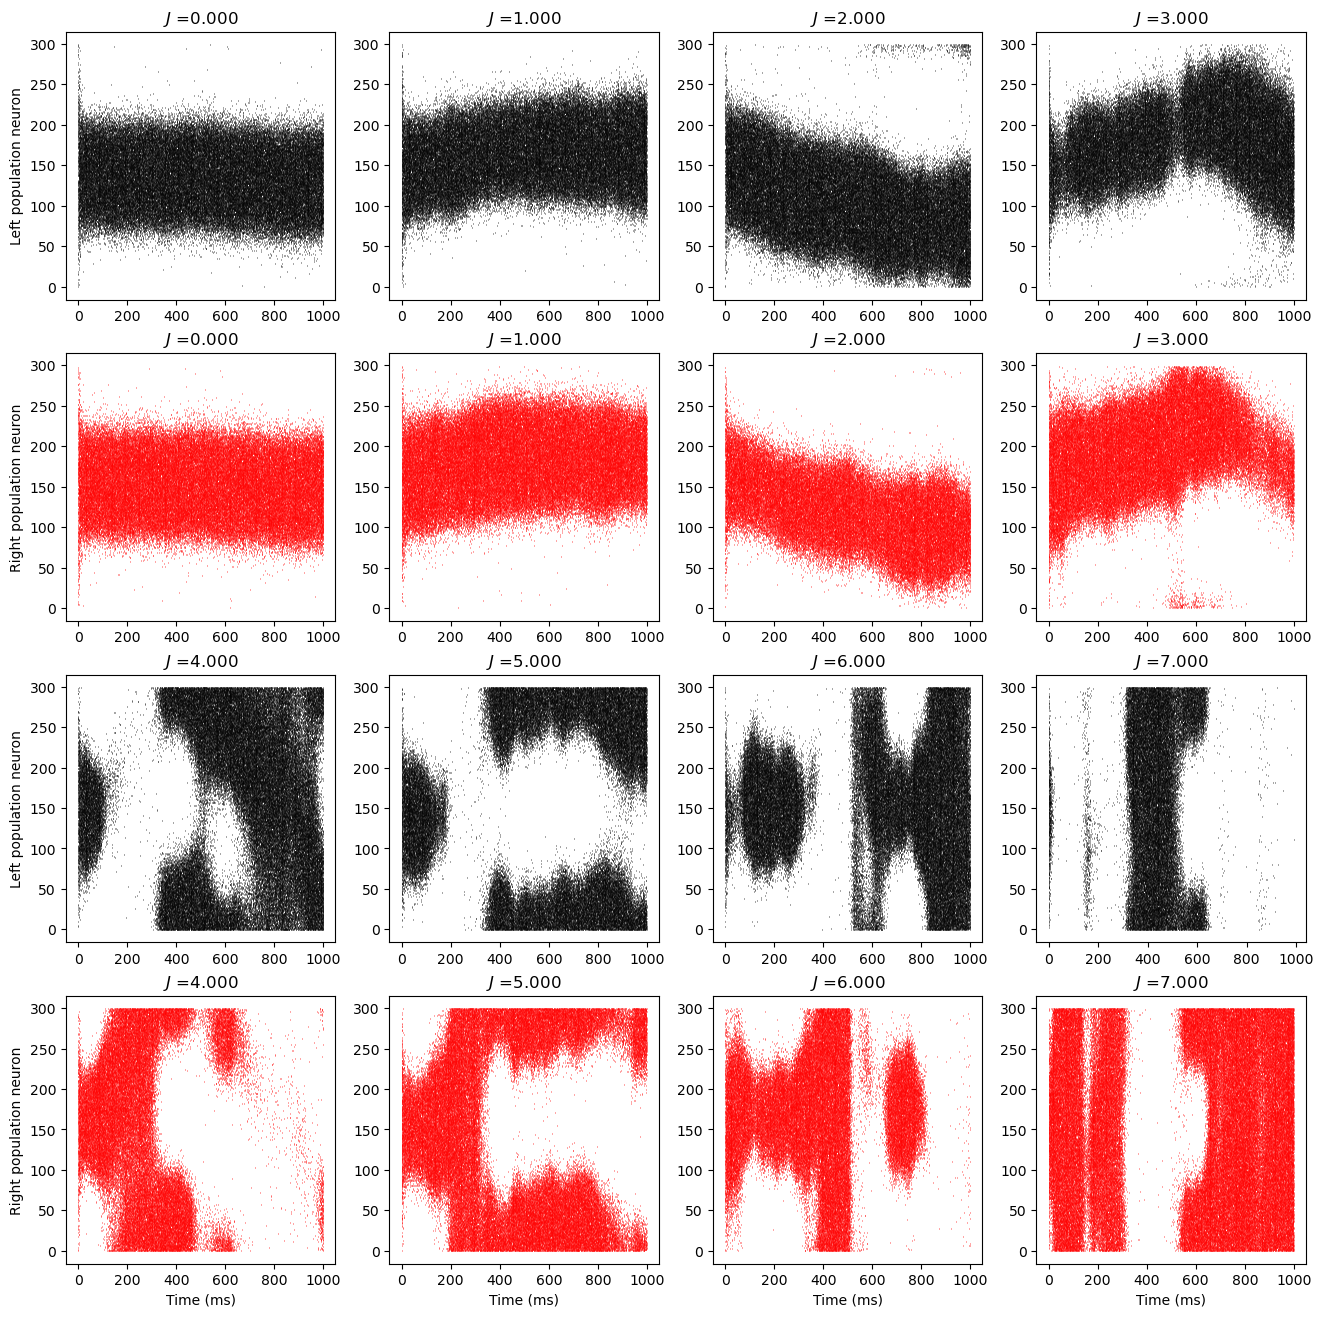

In [208]:
np.random.seed(0)

J_values = np.linspace(0, 7, 8)

fig, ax = plt.subplots(4, 4, figsize=(16, 16))

for i, J in enumerate(J_values):
    print(f'Running simulation {(J)}')
    x, y = i//4, i%4
    # defining smooth random trajectory
    head_dirs, positions = sim.smooth_random_trajectory(ct.T, ct.delta_t, speed, max_delta_theta)

    # defining head population and running spike simulation to get spikes
    head_population = PoissonNeuron(I_0=1, theta_H=head_dirs)
    h,s = head_population.spike_simulation(input_fct=head_population.head_external_input, initial_voltage=np.random.uniform(0, 1, ct.N))
    
    head_dir_smooth = sim.bins_spike(head_dirs, 10, ct.delta_t, 1, mean=True)
    # ax[2*x, y].plot(np.linspace(0, ct.T, len(head_dir_smooth)), np.cos(head_dir_smooth)*180/np.pi, color='b')    

    # defining the integrator that uses the head population information 
    integrator = TwoPopulationSimulation(J_head=J, head_population=head_population, J=3)
    hL, sL, hR, sR = integrator.simulation(initial_voltage=integrator.centered_voltage)

    sL1, sR1 = sim.bins_spike(sL, 1), sim.bins_spike(sR, 1)
    spike_timesL = [np.where(sL1.T[i] !=0)[0] for i in range(ct.N)]
    spike_timesR = [np.where(sR1.T[i] !=0)[0] for i in range(ct.N)]

    ax[2*x, y].eventplot(spike_timesL, orientation='horizontal', color='black', linewidth=0.5)
    ax[2*x+1, y].eventplot(spike_timesR, orientation='horizontal', color='red', linewidth=0.5)
    ax[2*x, y].set_title(r'$J$ =' + f'{J:.3f}')
    ax[2*x+1, y].set_title(r'$J$ =' + f'{J:.3f}')

for i in range(2):
    ax[2*i, 0].set_ylabel("Left population neuron")
    ax[2*i+1, 0].set_ylabel("Right population neuron")

for i in range(4): ax[3, i].set_xlabel('Time (ms)')

In [209]:
fig.savefig('3_3', dpi=600)

# 3.4

# 3.5

In [334]:
# defining smooth random trajectory
head_dirs, positions = sim.smooth_random_trajectory(ct.T, ct.delta_t, speed, max_delta_theta)

# defining head population and running spike simulation to get spikes
head_population = PoissonNeuron(I_0=1, theta_H=head_dirs)
h,s = head_population.spike_simulation(input_fct=head_population.head_external_input, initial_voltage=np.random.uniform(0, 1, ct.N))

# defining the integrator for the x value of the path
integrator_x = TwoPopulationSimulation(J_head=1.75, head_population=head_population, J=3)
hL_x, sL_x, hR_x, sR_x = integrator_x.simulation(initial_voltage=integrator_x.centered_voltage)

# defining the integrator for the y value of the path
integrator_y = TwoPopulationSimulation(J_head=1.75, head_population=head_population, x=False, J=3)
hL_y, sL_y, hR_y, sR_y = integrator_y.simulation(initial_voltage=integrator_y.centered_voltage)

100%|██████████| 9999/9999 [00:01<00:00, 7168.73it/s]


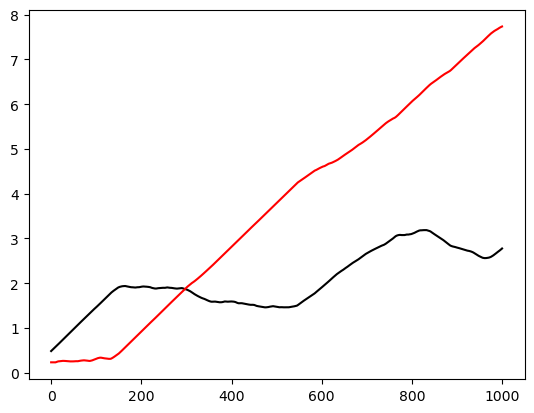

In [335]:
plt.plot(np.linspace(0, ct.T, len(positions[:,0])),positions[:,0], label='x', color='black')
plt.plot(np.linspace(0, ct.T, len(positions[:,1])),positions[:,1], label='y', color='red')

In [336]:
sL10_x = sim.bins_spike(sL_x, 10)
sR10_x = sim.bins_spike(sR_x, 10)
sL10_y = sim.bins_spike(sL_y, 10)
sR10_y = sim.bins_spike(sR_y, 10)

bump_locationL_x = sim.get_bump(sL10_x)
bump_locationR_x = sim.get_bump(sR10_x)
bump_locationL_y = sim.get_bump(sL10_y)
bump_locationR_y = sim.get_bump(sR10_y)

time = np.linspace(0, ct.T, len(bump_locationL_x))
x = 0.5*(np.array(bump_locationL_x) + np.array(bump_locationR_x))
y = 0.5*(np.array(bump_locationL_y) + np.array(bump_locationR_y))

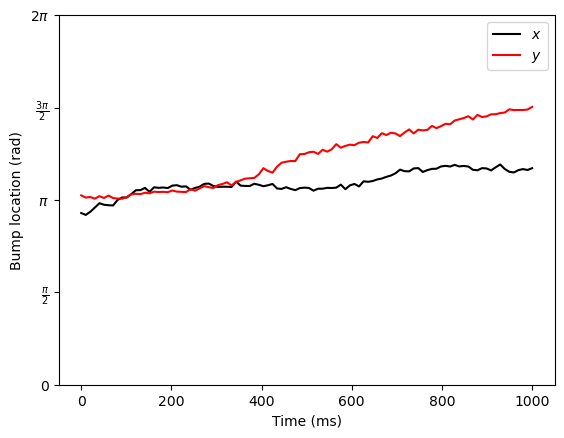

In [337]:
plt.plot(time,x, label=r'$x$', color='black')
plt.plot(time,y, label=r'$y$', color='red')
plt.xlabel('Time (ms)')
plt.ylabel('Bump location (rad)')
plt.yticks(np.linspace(0,2*np.pi,5, endpoint=True), ['0', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'])
plt.legend()
plt.show()

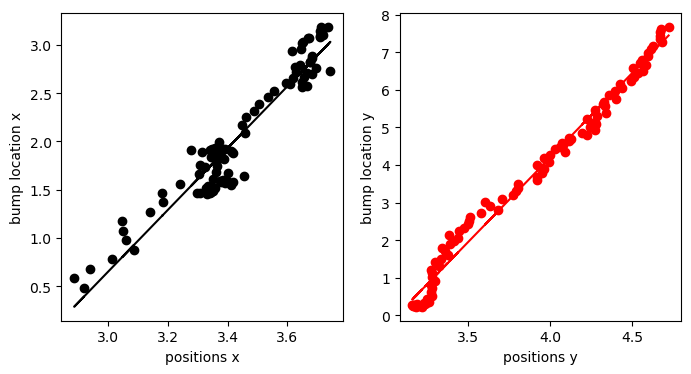

In [338]:
#supposed to be a straight line
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].scatter (x, positions[:, 0][::100], marker = "o", label = "x", color = "black")
ax[1].scatter (y, positions[:, 1][::100], marker = "o", label = "y", color = "red")
ax[0].set_xlabel("positions x")
ax[0].set_ylabel("bump location x")
ax[1].set_xlabel("positions y")
ax[1].set_ylabel("bump location y")

coefficients_x = np.polyfit(x, positions[:, 0][::100], 1)
coefficients_y = np.polyfit(y, positions[:, 1][::100], 1)
x_posi = np.poly1d(coefficients_x)
y_posi = np.poly1d(coefficients_y)

ax[0].plot(x, x_posi(x), label = "fit", color = "black")
ax[1].plot(y, y_posi(y), label = "fit", color = "red")


plt.show()

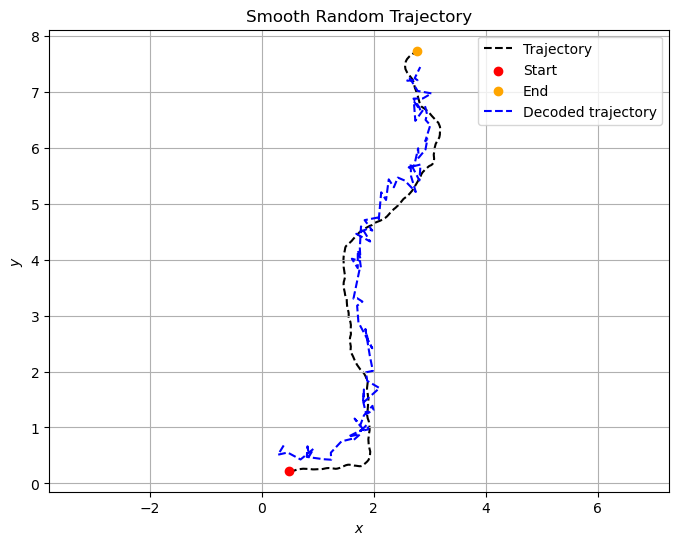

In [339]:
import matplotlib.pyplot as plt

# Plot trajectory
plt.figure(figsize=(8, 6))
plt.plot(positions[:, 0], positions[:, 1], label='Trajectory', color='black', ls='--', zorder=1)
plt.scatter(positions[0, 0], positions[0, 1], color='red', label='Start', zorder=2)
plt.scatter(positions[-1, 0], positions[-1, 1], color='orange', label='End', zorder=2)
plt.plot(x_posi(x), y_posi(y), 'b--', label='Decoded trajectory')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title('Smooth Random Trajectory')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

C:\Users\camil\AppData\Local\Temp\ipykernel_6536\2669484512.py:47: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  ax3.text(np.math.radians(label_position-10),(ax3.get_rmax()+2)/2.,'Time (ms)',


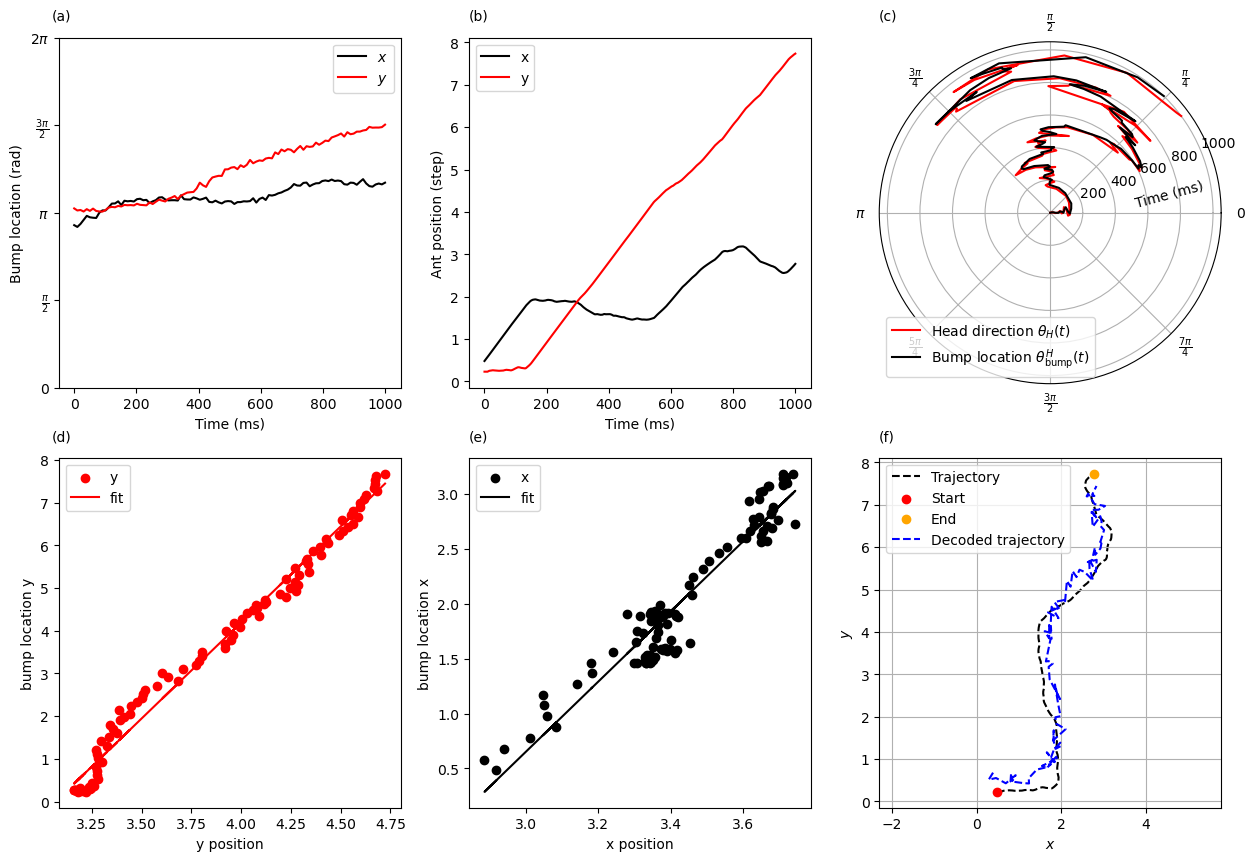

In [345]:
fig = plt.figure(figsize=(15, 10))
ax1 = plt.subplot(231)
ax2 = plt.subplot(232)
ax3 = plt.subplot(233, projection = 'polar')
ax4 = plt.subplot(234)
ax5 = plt.subplot(235)
ax6 = plt.subplot(236)


ax1.plot(time,x, label=r'$x$', color='black')
ax1.plot(time,y, label=r'$y$', color='red')
ax1.set_xlabel('Time (ms)')
ax1.set_ylabel('Bump location (rad)')
ax1.set_yticks(np.linspace(0,2*np.pi,5, endpoint=True), ['0', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'])
ax1.legend()
ax1.text(-0.02, 1.05, '(a)', transform=ax1.transAxes)

ax2.plot(np.linspace(0, ct.T, len(positions[:,0])),positions[:,0], label='x', color='black')
ax2.plot(np.linspace(0, ct.T, len(positions[:,1])),positions[:,1], label='y', color='red')
ax2.set_xlabel('Time (ms)')
ax2.set_ylabel('Ant position (step)')
ax2.legend()
ax2.text(1.2, 1.05, '(b)', transform=ax1.transAxes)


ax5.scatter (x, positions[:, 0][::100], marker = "o", label = "x", color = "black")
ax4.scatter (y, positions[:, 1][::100], marker = "o", label = "y", color = "red")
ax5.plot(x, x_posi(x), label = "fit", color = "black")
ax4.plot(y, y_posi(y), label = "fit", color = "red")
ax5.set_xlabel("x position")
ax5.set_ylabel("bump location x")
ax4.set_xlabel("y position")
ax4.set_ylabel("bump location y")
ax5.legend()
ax4.legend()
ax4.text(-0.02, -0.15, '(d)', transform=ax1.transAxes)
ax5.text(1.2, -0.15, '(e)', transform=ax1.transAxes)


h10 = sim.bins_spike(head_dirs, 10, N=1, mean=True)
s10 = sim.bins_spike(s, 10, N=ct.N)
bump_loc = sim.get_bump(s10)
ax3.plot(h10, np.linspace(0, ct.T, len(h10)), color='red', label=r'Head direction $\theta_H (t)$')
ax3.plot(bump_loc, np.linspace(0, ct.T, len(h10)), color='black', label=r'Bump location $\theta^H_{\text{bump}} (t)$')

label_position=ax3.get_rlabel_position()
ax3.text(np.math.radians(label_position-10),(ax3.get_rmax()+2)/2.,'Time (ms)',
        rotation= 15, ha='left',va='center')

# Set angular ticks to radians
ax3.set_xticks(np.linspace(0, 2*np.pi, 8, endpoint=False))  # Set ticks at 0, pi/4, pi/2, 3pi/4, pi, 5pi/4, 3pi/2, 7pi/4
ax3.set_xticklabels(['0', r'$\frac{\pi}{4}$', r'$\frac{\pi}{2}$', r'$\frac{3\pi}{4}$', r'$\pi$', r'$\frac{5\pi}{4}$', r'$\frac{3\pi}{2}$', r'$\frac{7\pi}{4}$'])
ax3.legend()
ax3.text(2.4, 1.05, '(c)', transform=ax1.transAxes)

ax6.plot(positions[:, 0], positions[:, 1], label='Trajectory', color='black', ls='--', zorder=1)
ax6.scatter(positions[0, 0], positions[0, 1], color='red', label='Start', zorder=2)
ax6.scatter(positions[-1, 0], positions[-1, 1], color='orange', label='End', zorder=2)
ax6.plot(x_posi(x), y_posi(y), 'b--', label='Decoded trajectory')
ax6.set_xlabel(r'$x$')
ax6.set_ylabel(r'$y$')
ax6.legend()
ax6.grid(True)
ax6.axis('equal')
ax6.text(2.4, -0.15, '(f)', transform=ax1.transAxes)

plt.legend()
plt.show()

In [346]:
fig.savefig('3_5.png', dpi=600)

# 3.7

In [131]:
N = 5000


# defining smooth random trajectory
head_dirs, positions = sim.smooth_random_trajectory(3000, ct.delta_t, speed, max_delta_theta)

# defining head population and running spike simulation to get spikes
head_population = PoissonNeuron(I_0=1, theta_H=head_dirs, N=N, T = 3000)
h,s = head_population.spike_simulation(input_fct=head_population.head_external_input, initial_voltage=np.random.uniform(0, 1, N))

# defining the integrator for the x value of the path
integrator_x = TwoPopulationSimulation(J_head=1.4, head_population=head_population, N = N, T = 3000, J=3)
hL_x, sL_x, hR_x, sR_x = integrator_x.simulation(initial_voltage=integrator_x.centered_voltage)

# defining the integrator for the y value of the path
integrator_y = TwoPopulationSimulation(J_head=1.4, head_population=head_population, x=False, N = N, T = 3000, J=3)
hL_y, sL_y, hR_y, sR_y = integrator_y.simulation(initial_voltage=integrator_y.centered_voltage)

100%|██████████| 29999/29999 [02:35<00:00, 193.41it/s]


In [132]:
sL10_x = sim.bins_spike(sL_x, 10, N=N)
sR10_x = sim.bins_spike(sR_x, 10, N=N)
sL10_y = sim.bins_spike(sL_y, 10, N=N)
sR10_y = sim.bins_spike(sR_y, 10, N=N)

bump_locationL_x = sim.get_bump(sL10_x, N = N)
bump_locationR_x = sim.get_bump(sR10_x, N = N)
bump_locationL_y = sim.get_bump(sL10_y, N = N)
bump_locationR_y = sim.get_bump(sR10_y, N = N)

time = np.linspace(0, ct.T, len(bump_locationL_x))
x = 0.5*(np.array(bump_locationL_x) + np.array(bump_locationR_x))
y = 0.5*(np.array(bump_locationL_y) + np.array(bump_locationR_y))

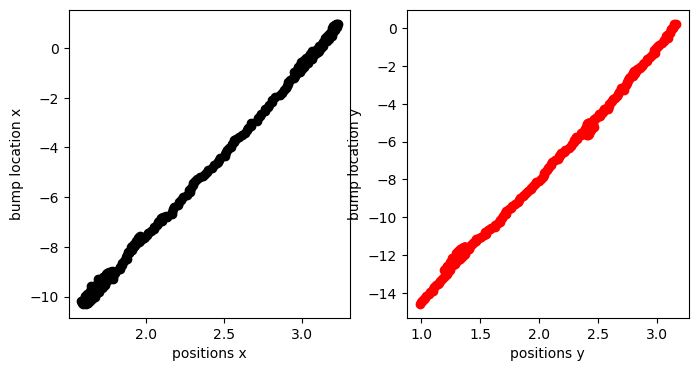

In [133]:
#supposed to be a straight line
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].scatter (x, positions[:, 0][::100], marker = "o", label = "x", color = "black")
ax[1].scatter (y, positions[:, 1][::100], marker = "o", label = "y", color = "red")
ax[0].set_xlabel("positions x")
ax[0].set_ylabel("bump location x")
ax[1].set_xlabel("positions y")
ax[1].set_ylabel("bump location y")

plt.show()

In [134]:
sL10_x.shape

(300, 5000)

In [135]:
coefficients_x = np.polyfit(x, positions[:, 0][::100], 1)
coefficients_y = np.polyfit(y, positions[:, 1][::100], 1)
x_posi = np.poly1d(coefficients_x)
y_posi = np.poly1d(coefficients_y)

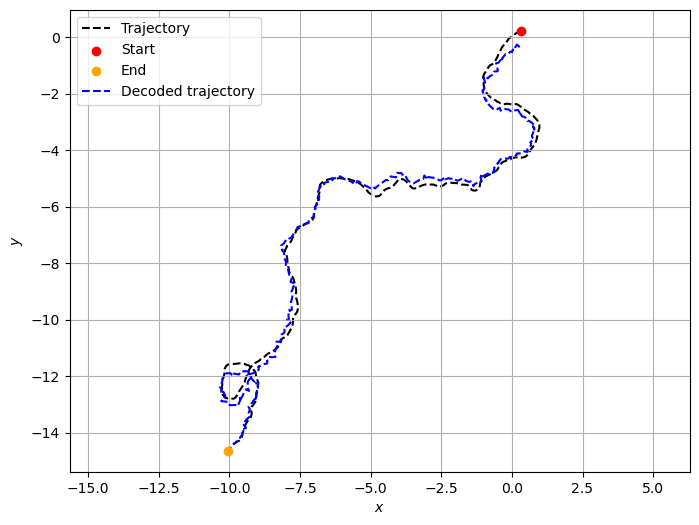

In [136]:
import matplotlib.pyplot as plt

# Plot trajectory
plt.figure(figsize=(8, 6))
plt.plot(positions[:, 0], positions[:, 1], label='Trajectory', color='black', ls='--', zorder=1)
plt.scatter(positions[0, 0], positions[0, 1], color='red', label='Start', zorder=2)
plt.scatter(positions[-1, 0], positions[-1, 1], color='orange', label='End', zorder=2)
plt.plot(x_posi(x), y_posi(y), 'b--', label='Decoded trajectory')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

# 3.7